# Project: Investigation of the Medical Appointment No-shows data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>   In this project, the Medical Appointments No-Shows dataset will be used. This dataset contains 14 variables, which are, PatientId, AppointmentID, Gender, ScheduledDay,	AppointmentDay,	Age, Neighbourhood,	Scholarship, Hipertension Diabetes, Alcoholism,	Handcap, SMS_received, and No-show.
Questions of interest to be addressed in this analysis are as follows;
>   1. What is the average age of people who showed up for their medical appointments? 
>   2. Are patients enrolled on scholarship more likely to show up for their medical appointments?
>   3. Which day in the month recieves the most appointment schedules?

In [1]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# Remember to include a 'magic word' so that your visualizations are plotted
# inline with the notebook. See this page for more:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
import os
os.chdir(r'C:\Users\ELISHA\Downloads')

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df_medic = pd.read_csv('KaggleV2-May-2016.csv', sep = ',', header=0)
df_medic.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# here we observe the last ten rows of the data frame to a have an idea what is looks like
df_medic.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# obtaining brief summary statistics of the data set, with the describe function.
# display is rounded to three decimal place.
round(df_medic.describe(), 3)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000
mean,1.474963e+14,5675305.123,37.089,0.098,0.197,0.072,0.030,0.022,0.321
std,2.560949e+14,71295.752,23.110,0.298,0.398,0.258,0.172,0.162,0.467
min,3.921784e+04,5030230.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.172614e+12,5640285.500,18.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.173184e+13,5680573.000,37.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.439172e+13,5725523.500,55.000,0.000,0.000,0.000,0.000,0.000,1.000
max,9.999816e+14,5790484.000,115.000,1.000,1.000,1.000,1.000,4.000,1.000


In [6]:
# here the info function is used to obtain information on the number of columns and their data types. 
# we also check if there are missing values in any of the columns
df_medic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# checking for duplicate values in rows, and obtaining the count
df_medic.duplicated().sum()

0

In [8]:
# here we check for existence of null values, and obtain count of them if any.
pd.DataFrame(df_medic.isna()).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
# we check for unique values in columns.
df_medic.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
# this shows that a patient has at least one appointment schedule
df_medic.shape[0] == df_medic.PatientId.nunique()

False

In [11]:
# obtaining a subset of object typed columns of the dataset 
df_medic_obj = df_medic.select_dtypes(include=['object'])
# the resulting dataset is filtered based on the following columns 'Gender', 'Neighbourhood', and 'No-show'
df_medic_obj = df_medic_obj[['Gender', 'Neighbourhood', 'No-show']]
df_medic_obj

,Gender,Neighbourhood,No-show
0,F,JARDIM DA PENHA,No
1,M,JARDIM DA PENHA,No
2,F,MATA DA PRAIA,No
3,F,PONTAL DE CAMBURI,No
4,F,JARDIM DA PENHA,No
...,...,...,...
110522,F,MARIA ORTIZ,No
110523,F,MARIA ORTIZ,No
110524,F,MARIA ORTIZ,No
110525,F,MARIA ORTIZ,No


In [12]:
#a function that plots a bar chart of categorical variables 
def my_plot(df, figsize):
    
    '''a function to plot a bar chart visualization of the distribution of categorical variables'''
    
    i=0
    n = len(df.columns)
    fig, ax = plt.subplots(n, figsize=figsize, squeeze=False)
    while i <= n:
        for col in df.columns:
            xlabels = [l for l in df[col].value_counts().index ]
            fig.suptitle('Bar chart visualization of categorical columns')
            ax = ax.flatten()
            ax[i].bar(xlabels, df[col].value_counts().values, label=col)
            ax[i].set_title(f'A distribution of {col} column')
            ax[i].set_ylabel('Frequency')
            ax[i].tick_params(axis='x', labelrotation=90)
            fig.subplots_adjust(hspace=1, wspace=.5)
            i+=1
        return plt.show()

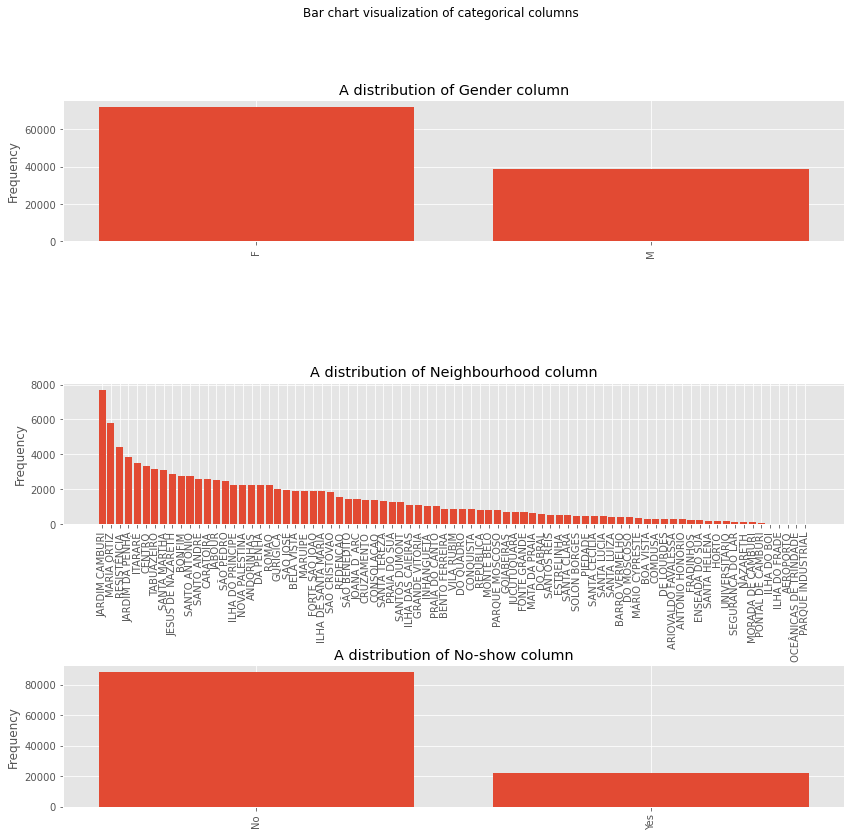

In [13]:
my_plot(df_medic_obj, (14, 13));

In [14]:
# here we check for the neighbourhood with the maximum value 
df_medic_obj[['Neighbourhood']].value_counts()

Neighbourhood              
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Length: 81, dtype: int64

Of a total of 81 neighbourhoods, JARDIM CAMBURI neigbourhood has appeared to have the highest number of patients at 7717, while the PARQUE INDUSTRIAL neigbourhood has the least number of patients at just 1. Also, the dataset indicates quite a high number of females, about twice as much the number of males. Furthermore, a bar plot of the the __No-show__ column indicates that patients who failed to show up for appointment schedules far outnumbered those who actually showed up for their appointment schedules.

In [15]:
# selecting columns of  numeric datatype
# and obtaining a subset of it based on 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', and the 'Handcap' columns
# which seem more relevant, and likely to contain some insights
df_medic_num = df_medic.select_dtypes(include=['int64', 'float64'])
df_medic_num = df_medic_num[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']]

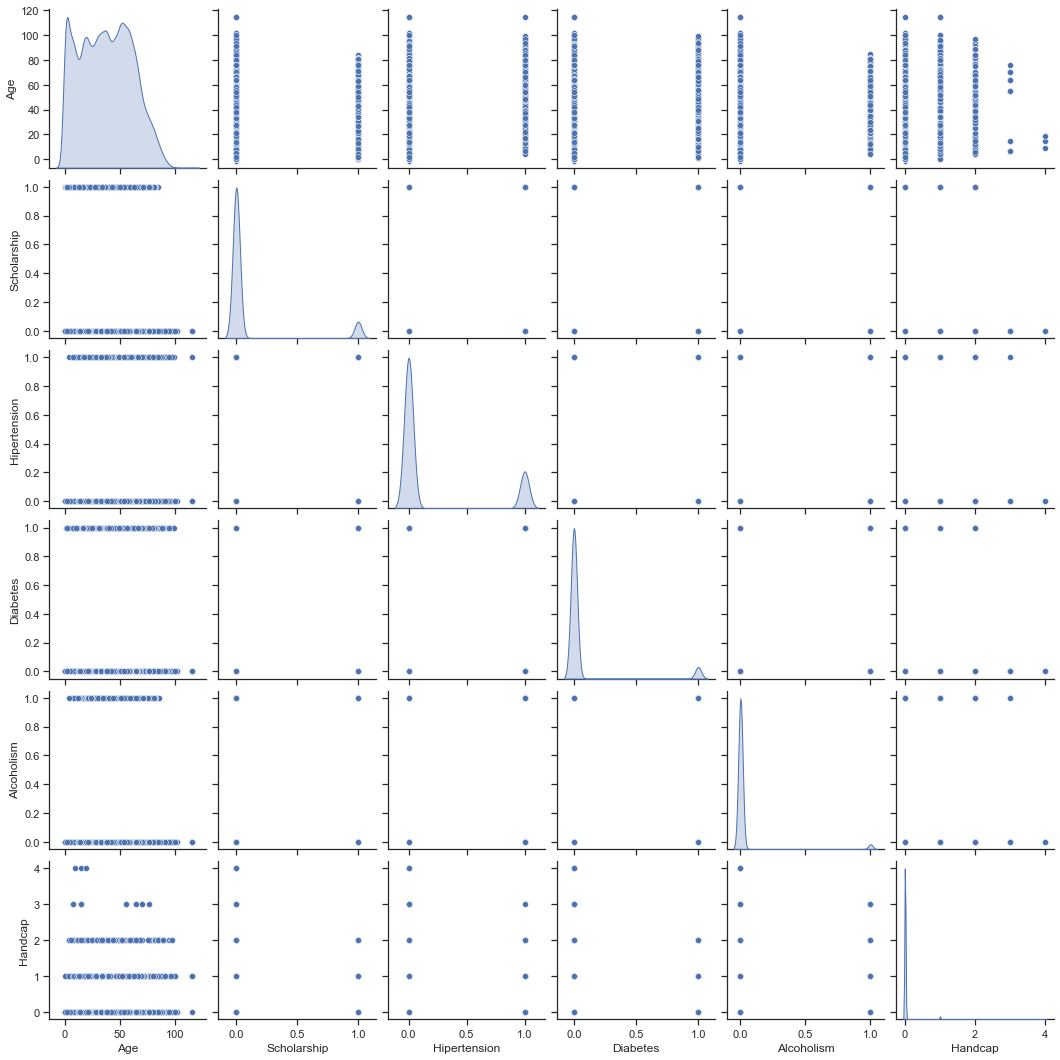

In [16]:
#  a pair plot of the variables for a high-level overview of the relationship among them aswell as how each  
# of the variables are distributed
sns.set_theme(style="ticks") 
sns.pairplot(df_medic_num, diag_kind='kde')
plt.show()

The seaborn pairplot doesn't seem to show much of a relationship among the numeric columns. However, the kernel density plot gives
some insight into the distribution of the individual column values. It can be assumed none of the patients was handicapped from the kde of the  __Handcap__ column.

In [17]:
#this indicates that a patient books at least 2 appointments  
df_medic.shape[0] > df_medic.PatientId.nunique()

True

### Notes
After assessing the data using various approach, the following were observed;
>- There were no duplicate rows in the dataset
>- There were no null or missing values in the dataset
>- The dataset is well structured and column values are consistent
>- No outliers are spotted in the column values distribution for each of the columns

With all of these, the dataset is pretty much fine for further exploration, hence, no changes will be made to it.  

### Data Cleaning 

The dataset has been inspected, and from the summary statistics, all columns have complete values, hence, no missing values. Similarly, the rows contain unique entries, no duplicates were found. Also, the columns appear to contain reasonable values, given their 
descriptions **(labels)**. 

<a id='eda'></a>
## Exploratory Data Analysis

 After the data set has been inspected and modified accordingly, the next step of the analysis is to carry out **EDA** on the 
 data set to answer the questions posed in the beginning of the notebook.

### 1. What is the average age of people who showed up for their medical appointments?


In [18]:
df_medic.groupby('No-show')['Age'].mean()['Yes']

34.31766656212196

We can further explore details of this by ploting the distribution (**histogram**) of the ages of patients who kept to appointment schedules and that of those who failed to.

### visualizing the age distribution of patients who show up for appointment schedules and patients who do not

In [19]:
#creating a mask for patients who failed to keep to appointment schedules
No_mask = df_medic['No-show']== 'No'

#filtering dataframe by number of patients who failed to show up for their medical appointments
df_No = df_medic[No_mask]

In [20]:
#creating a mask for patients who kept to appointment schedules
Yes_mask = df_medic['No-show']== 'Yes'

#filtering dataframe by number of patients who failed to show up for their medical appointments
df_Yes = df_medic[Yes_mask]

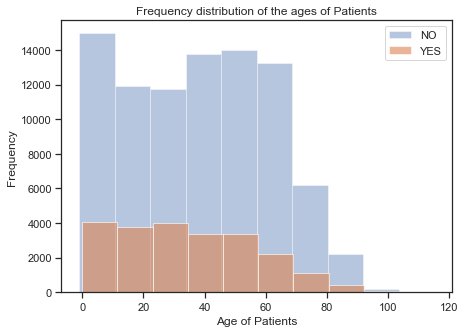

In [21]:
fig = plt.subplots(figsize=(7, 5))
#plt.style.use('ggplot')
df_No['Age'].plot.hist(label='NO', alpha=0.4)
df_Yes['Age'].plot.hist(label='YES', alpha=0.6)
plt.xlabel('Age of Patients')
plt.title('Frequency distribution of the ages of Patients')
plt.legend(loc='upper right')
plt.show()

From the histogram plot, it seems that ages of patients who kept to appointment schedules as well as that of those
who failed to keep to schedules have almost similar distribution. The plot also indicates that the number of patients who failed to keep to appointment schedules far exceeds that of those who actually kept to schedules.
Also, it is apparent that patients older than the average age of **37.089** tend not to keep to their medical appointments compared to younger Patients.

### 2. Are patients enrolled on Scholarship more likely to show up for their medical appointments?

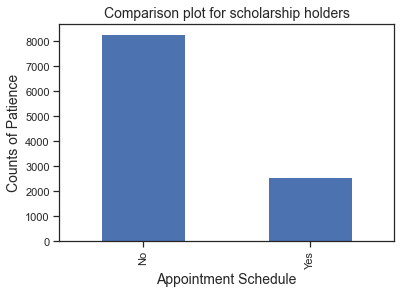

In [22]:
#the dataframe is filtered by Scholarship holders (1), and the value count of the No-show column is returned and plotted
#with a bar plot to visualize the distribution of the labels.
 
df_medic[df_medic['Scholarship'] == 1]['No-show'].value_counts().plot.bar();
plt.xlabel('Appointment Schedule', fontsize=14)
plt.ylabel('Counts of Patience', fontsize=14)
plt.title('Comparison plot for scholarship holders', fontsize=14)
plt.show()

The bar plot above compares whether Patients on Scholarship kept to medical appointments more than patients not on Scholarship. The plot, however, indicates that patients on walfare did not keep to their appointment schedules as much as those not on Scholarship.

### 3. Which day in the months recieves the most appointment schedule?
**(ScheduledDay)**

Here we visualize days and how much appointments are scheduled on these days, to have an idea of the day with highest number of appointments and to also discover possible trends.

Text(0.5, 1.0, 'Plot of Schedules by days of the month')

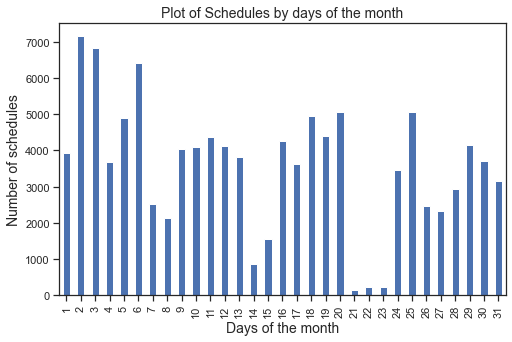

In [23]:
fig = plt.figure(figsize=(8, 5))
df_medic['ScheduledDay'] = pd.to_datetime(df_medic['ScheduledDay'].to_list())
p = df_medic['ScheduledDay'].dt.day.value_counts().sort_index().plot.bar();
plt.xlabel('Days of the month', fontsize=14)
plt.ylabel('Number of schedules', fontsize=14)
plt.title('Plot of Schedules by days of the month', fontsize=14);

Given the plot above, it is observed that the number of appointment schedules by days is fairly constant, but, with a few dips. The second day of every month appears to have the highest number of schedules, with the 21, 22, and 23 days having the least number of  appointment schedules. 

<a id='conclusions'></a>
## Conclusions
From the analysis of the dataset based on the research questions, it was discovered that the age distribution of patients who 
kept to their appointment schedules and patients who did not, seem to be similar. With older patients tending not to keep to 
their schedules far more than the younger patients. The analysis, however,did not try to investigate this pattern. It was also found that patients on scholarship tend to miss their appointment sechedules far more than patients who are not on scholar
ship. In addition, the number of daily appointment schedules over the years seems to be fairly constant from 2015 to 2016, with the 2, 3, and 6 days having the highest appointments, and the 21, 22, and 23 days having the least appointment schedules. This analysis is limited to the research questions, with no further investigations of the findings. A possible limitation of conclusions based on this analysis might be the data sampling technique. The dataset does not seem to be representative in equal proportion, of the gender of the entire population of patients to the health care facility. There seem to have been some bias in the sample collection process resulting in large amount of samples from one category (__female__) of the population, which might not allow for generalization of results from this analysis. Hence, improvement could be made in the results by applying more robust sampling techniques. 

## Reference
[matplotlib doc](https://matplotlib.org/stable/users/index.html)
[pandas doc](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
[numpy doc](https://numpy.org/doc/1.22/user/index.html#user)
[seaborn doc](https://seaborn.pydata.org/examples/scatterplot_matrix.html)
[adamsmith](https://www.adamsmith.haus/python/answers/how-to-check-the-type-of-a-series-in-python)
[geeksforgeeks](https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/?ref=lbp)
[stackoverflow](https://stackoverflow.com/questions/25124143/matplotlib-subplots-get-rid-of-tick-labels-altogether#:~:text=add_subplot(3%2C%201%2C%20i%2B,can%20remove%20the%20default%20ticks)